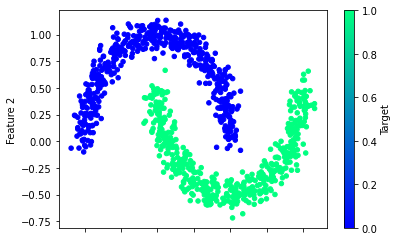

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [2]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.6825 - accuracy: 0.5040
Epoch 2/100
750/750 [==============================] - 0s 51us/sample - loss: 0.6796 - accuracy: 0.5240
Epoch 3/100
750/750 [==============================] - 0s 50us/sample - loss: 0.6765 - accuracy: 0.5453
Epoch 4/100
750/750 [==============================] - 0s 51us/sample - loss: 0.6730 - accuracy: 0.5667
Epoch 5/100
750/750 [==============================] - 0s 51us/sample - loss: 0.6693 - accuracy: 0.5867
Epoch 6/100
750/750 [==============================] - 0s 47us/sample - loss: 0.6654 - accuracy: 0.5987
Epoch 7/100
750/750 [==============================] - 0s 53us/sample - loss: 0.6611 - accuracy: 0.6093
Epoch 8/100
750/750 [==============================] - 0s 51us/sample - loss: 0.6563 - accuracy: 0.6147
Epoch 9/100
750/750 [==============================] - 0s 48us/sample - loss: 0.6514 - accuracy: 0.6280
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 51us/sample - loss: 0.3233 - accuracy: 0.8840
Epoch 79/100
750/750 [==============================] - 0s 51us/sample - loss: 0.3213 - accuracy: 0.8840
Epoch 80/100
750/750 [==============================] - 0s 50us/sample - loss: 0.3195 - accuracy: 0.8853
Epoch 81/100
750/750 [==============================] - 0s 48us/sample - loss: 0.3178 - accuracy: 0.8867
Epoch 82/100
750/750 [==============================] - 0s 50us/sample - loss: 0.3161 - accuracy: 0.8880
Epoch 83/100
750/750 [==============================] - 0s 48us/sample - loss: 0.3145 - accuracy: 0.8880
Epoch 84/100
750/750 [==============================] - 0s 49us/sample - loss: 0.3131 - accuracy: 0.8893
Epoch 85/100
750/750 [==============================] - 0s 51us/sample - loss: 0.3116 - accuracy: 0.8893
Epoch 86/100
750/750 [==============================] - 0s 51us/sample - loss: 0.3102 - accuracy: 0.8893
Epoch 87/100
750/750 [==============================] - 0s 48us/samp

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.2703 - accuracy: 0.8560
Loss: 0.29628429079055785, Accuracy: 0.8560000061988831


In [6]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=100)


Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 826us/sample - loss: 0.5998 - accuracy: 0.5400
Epoch 2/100
750/750 [==============================] - 0s 51us/sample - loss: 0.5680 - accuracy: 0.5720
Epoch 3/100
750/750 [==============================] - 0s 51us/sample - loss: 0.5417 - accuracy: 0.6000
Epoch 4/100
750/750 [==============================] - 0s 52us/sample - loss: 0.5191 - accuracy: 0.6293
Epoch 5/100
750/750 [==============================] - 0s 50us/sample - loss: 0.5001 - accuracy: 0.6880
Epoch 6/100
750/750 [==============================] - 0s 53us/sample - loss: 0.4835 - accuracy: 0.7253
Epoch 7/100
750/750 [==============================] - 0s 53us/sample - loss: 0.4685 - accuracy: 0.7467
Epoch 8/100
750/750 [==============================] - 0s 48us/sample - loss: 0.4550 - accuracy: 0.7627
Epoch 9/100
750/750 [==============================] - 0s 55us/sample - loss: 0.4422 - accuracy: 0.7747
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 52us/sample - loss: 0.1645 - accuracy: 0.9320
Epoch 79/100
750/750 [==============================] - 0s 50us/sample - loss: 0.1624 - accuracy: 0.9333
Epoch 80/100
750/750 [==============================] - 0s 47us/sample - loss: 0.1604 - accuracy: 0.9347
Epoch 81/100
750/750 [==============================] - 0s 48us/sample - loss: 0.1582 - accuracy: 0.9360
Epoch 82/100
750/750 [==============================] - 0s 46us/sample - loss: 0.1563 - accuracy: 0.9373
Epoch 83/100
750/750 [==============================] - 0s 47us/sample - loss: 0.1540 - accuracy: 0.9400
Epoch 84/100
750/750 [==============================] - 0s 48us/sample - loss: 0.1519 - accuracy: 0.9400
Epoch 85/100
750/750 [==============================] - 0s 51us/sample - loss: 0.1498 - accuracy: 0.9413
Epoch 86/100
750/750 [==============================] - 0s 49us/sample - loss: 0.1477 - accuracy: 0.9413
Epoch 87/100
750/750 [==============================] - 0s 48us/samp

In [7]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.1101 - accuracy: 0.9320
Loss: 0.12690202230215072, Accuracy: 0.9319999814033508
